In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df_polarity = pd.read_csv('polarity_socre.csv',sep='\t',encoding='utf-8')

In [18]:
df = pd.read_csv('[Final]Best_feautres_df.csv',sep='\t',encoding='utf-8')

In [19]:
df1 = pd.read_csv('additional_feature_from_user_study.csv',sep='\t',encoding='utf-8')

In [20]:
df2 = pd.read_csv('Count_mistake.csv',sep='\t',encoding='utf-8')

In [21]:
Total_df = pd.merge(df,df1) 

In [22]:
Total_df = pd.merge(Total_df,df2)

In [23]:
temp_df = Total_df[['Post_id','effort_ratio','effort_img_ratio']]

In [24]:
temp_df.to_csv('previous_work_features.csv',sep='\t',encoding='utf-8',index=False)

In [25]:
drop_column_list = ['Post_id', 'Blog_mobile_profile_img','Count_neighbors','Post_interval_average',
 'Text_similarity',
 'Total_post',
 'User_Id_len',
 'Comment_interaction',
 'Blog_mobile_profile_img',
 'Opening_date','Blog_info_text_len']

In [11]:
new_df = Total_df.drop(drop_column_list,axis=1)

In [12]:
new_df['Polarity'] = df_polarity['polarity'].tolist()

In [13]:
Analysis_df = new_df.fillna(0)

In [14]:
Analysis_df.to_csv('[Final]Our_feature_model.csv',sep='\t',encoding='utf-8',index=False)

In [15]:
Analysis_df

,FR_url,Question_count,First_ratio,Second_ratio,Tag_count,Text_len,senti_diffs_per_ref,pos_ratio,neg_ratio,subjectivity,...,text img img img text,text img img text img,text img text img img,text img text img text,Left,Center,Right,Justify,Count_space_mistake,Polarity
0,0,0,0.001824,0.000000,3,4386.00000,-2.441315e-02,3.474178e-02,5.915493e-02,9.389671e-02,...,0.000000,0.000000,0.000000,0.000000,0.0,7.0,0.0,0.0,100.0,2.600000e-01
1,0,0,0.000000,0.000000,6,397.00000,-3.296703e-02,3.296703e-02,6.593407e-02,9.890110e-02,...,0.000000,0.000000,0.000000,0.735083,0.0,66.0,0.0,0.0,8.0,3.333333e-01
2,0,0,0.000000,0.000000,6,453.00000,1.886792e-02,7.547170e-02,5.660377e-02,1.320755e-01,...,0.000000,0.000000,0.000000,0.894575,3.0,41.0,0.0,0.0,10.0,-1.428571e-01
3,0,0,0.001488,0.000000,6,1344.00000,-1.644737e-02,2.302632e-02,3.947368e-02,6.250000e-02,...,0.000000,0.000000,0.000000,0.735083,0.0,90.0,0.0,0.0,28.0,2.631579e-01
4,0,0,0.000000,0.000000,5,372.00000,1.098901e-02,5.494505e-02,4.395604e-02,9.890110e-02,...,0.000000,0.000000,0.000000,0.747683,0.0,55.0,0.0,0.0,11.0,-1.111111e-01
5,0,0,0.002677,0.000000,4,747.00000,5.649718e-03,5.649718e-02,5.084746e-02,1.073446e-01,...,0.000000,0.000000,0.000000,0.740217,0.0,72.0,0.0,0.0,11.0,-5.263158e-02
6,0,0,0.000865,0.000000,7,1156.00000,-2.197802e-02,3.296703e-02,5.494505e-02,8.791209e-02,...,0.000000,0.000000,0.000000,0.728483,2.0,106.0,0.0,0.0,24.0,2.500000e-01
7,0,0,0.000634,0.000000,8,1577.00000,-2.857143e-02,3.376623e-02,6.233766e-02,9.610390e-02,...,0.000000,0.000000,0.000000,0.725284,0.0,156.0,0.0,0.0,38.0,2.972973e-01
8,0,0,0.000000,0.000000,8,618.00000,-2.083333e-02,6.944444e-03,2.777778e-02,3.472222e-02,...,0.000000,0.000000,0.000000,0.747683,0.0,54.0,0.0,0.0,14.0,6.000000e-01
9,0,0,0.000000,0.000000,0,0.00001,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000e-09


# Data shuffle

In [33]:
from sklearn.utils import shuffle
Analysis_df = shuffle(Analysis_df)

# MinMaxScaler

In [17]:
x = Analysis_df.drop(columns='Credibility',axis=1)
y = Analysis_df[['Credibility']]
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x) 

# Min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(x) 
X_scaled = pd.DataFrame(scaler.transform(x),columns = x.columns)

## Chi-squre feature selection

In [108]:
feature_name = X_scaled.columns.tolist()

In [109]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_selector = SelectKBest(chi2, k=20)
chi2_selector.fit(X_scaled, y)

# Look at scores returned from the selector for each feature
chi2_scores = pd.DataFrame(list(zip(feature_name, chi2_selector.scores_, chi2_selector.pvalues_)), columns=['ftr', 'score', 'pval'])
chi2_scores

# you can see that the kbest returned from SelectKBest 
#+ were the two features with the _highest_ score
kbest = np.asarray(feature_name)[chi2_selector.get_support()]

In [110]:
feature_dict = dict(zip(feature_name,chi2_selector.scores_))
ranking_list = reversed(sorted(feature_dict.items(), key =lambda feature_dict:feature_dict[1]))
print('Feature ranking:')
for feature in ranking_list:
    #print ('feature : %d %s (%f)' % (num+1,Feautre_list[feature[0]],feature[1]))
    print(feature[0])

Feature ranking:
FR_url
img text img text img
text img text img text
img img img img img
Sticker_count
img img img text img
text img img img img
img img img img text
img text img img img
text img img img text
img text img img text
Tag_count
Polarity
Center
img img text img img
neg_ratio
text img text img img
Right
text img img text img
subjectivity
First_ratio
Second_ratio
effort_img_ratio
Question_count
Left
img img text img text
effort_ratio
Justify
Count_space_mistake
senti_diffs_per_ref
pos_ratio


## Standard scaler

In [52]:
x = Analysis_df.drop(columns='Credibility',axis=1)
y = Analysis_df[['Credibility']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x) 
X_scaled = pd.DataFrame(scaler.transform(x),columns = x.columns)

In [53]:
X_scaled = X_scaled[['Question_count','First_ratio','Second_ratio','Tag_count','pos_ratio',
 'neg_ratio','subjectivity','Polarity','senti_diffs_per_ref','Sticker_count','Text_len','Count_space_mistake',
'effort_ratio','effort_img_ratio','Left','Center','Right','Justify',
   'img img img img img','img img img img text','img img img text img','img img text img img','img img text img text',
 'img text img img img','img text img img text','img text img text img','text img img img img','text img img img text',
 'text img img text img','text img text img img','text img text img text']]

In [54]:
# import pickle
# scalerfile = 'scaler.pkl'
# pickle.dump(scaler, open(scalerfile, 'wb'))

# import pickle
# scalerfile = 'scaler.sav'
# scaler = pickle.load(open(scalerfile, 'rb'))
# test_scaled_set = scaler.transform(test_set)

In [55]:
feature_name = X_scaled.columns.tolist()

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled , y , test_size=0.33, random_state=42)

## Random Forest

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [58]:
print("RF :",accuracy_score(clf.predict(x_test),y_test))

RF : 0.8117450288050548


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(x_test)))

             precision    recall  f1-score   support

          0       0.77      0.73      0.75      2088
          1       0.83      0.87      0.85      3293

avg / total       0.81      0.81      0.81      5381



In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_scaled, y, cv=5)
scores   

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn

array([0.79858982, 0.82280809, 0.79754601, 0.83251534, 0.81441718])

Feature ranking:
Center
text img text img text
Count_space_mistake
img text img text img
Sticker_count
Justify
Polarity
effort_ratio
Question_count
Left
img img img img img
subjectivity
img img text img text
text img img text img
Text_len
neg_ratio
text img text img img
text img img img text
effort_img_ratio
Right
img text img img img
img img img img text
img text img img text
senti_diffs_per_ref
text img img img img
img img text img img
pos_ratio
Tag_count
Second_ratio
First_ratio
img img img text img


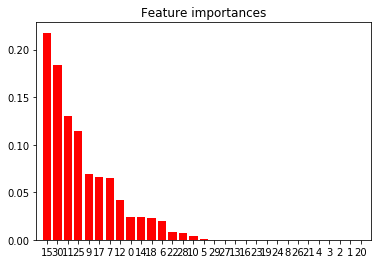

In [61]:
importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_scaled.shape[1]):
    #print("%d. feature: %s (%f)" % (f + 1, Feautre_list[indices[f]], importances[indices[f]]))
    print(feature_name[indices[f]])
    #print(importances[indices[f]])
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

# Logistic Regression

In [62]:
from  sklearn  import  linear_model
logreg = linear_model.LogisticRegression(C=2.0,random_state=42,solver='sag',multi_class='multinomial',warm_start=True)
logreg.fit(x_train, y_train)

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='sag',
          tol=0.0001, verbose=0, warm_start=True)

In [63]:
print("LR :",accuracy_score(logreg.predict(x_test),y_test))

LR : 0.7961345474818807


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(x_test)))

             precision    recall  f1-score   support

          0       0.72      0.77      0.75      2088
          1       0.85      0.81      0.83      3293

avg / total       0.80      0.80      0.80      5381



In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_scaled, y, cv=5)
scores         

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did n

array([0.77222563, 0.80134887, 0.74202454, 0.79785276, 0.81226994])

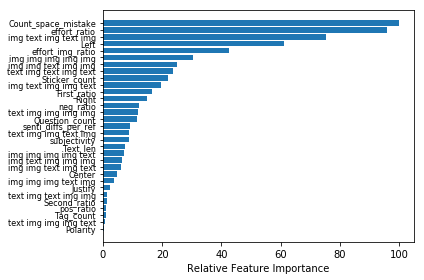

In [66]:
feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [36]:
feature_dict = dict(zip(feature_name,feature_importance))
ranking_list = reversed(sorted(feature_dict.items(), key =lambda feature_dict:feature_dict[1]))
print('Feature ranking:')
for feature in ranking_list:
    #print ('feature : %d %s (%f)' % (num+1,Feautre_list[feature[0]],feature[1]))
    print(feature[1])

Feature ranking:
100.0
58.567319179565736
53.302075605632346
41.61713632305427
38.4521790113738
32.40288142222204
22.569162712739317
22.047022900200528
21.050164140564025
19.52002214603019
17.570347367189363
16.262665174749174
13.845897411831597
12.516798020854687
11.738149945295389
11.445594660998184
10.626588521467351
9.894705204259175
6.918997041307069
6.840872730305373
4.418965240760019
3.312705603624015
3.1901464204107945
2.6451962051128635
2.518639542444863
1.9961109636306844
1.1315710625736566
0.6503480923898161
0.3553917393913296


## MLP

In [68]:
import time
from sklearn.neural_network import MLPClassifier

In [69]:
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(5,),
    max_iter=100,
    alpha=1e-4,
    solver='sgd',
    verbose=10,
    tol=1e-4,
    random_state=1,
    learning_rate_init=.1
)

In [70]:
start = time.time()
mlp_clf.fit(x_train, y_train)
end = time.time()
print('Time: {:f}s'.format(end-start))

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.56501141
Iteration 2, loss = 0.46054102
Iteration 3, loss = 0.43194484
Iteration 4, loss = 0.41810505
Iteration 5, loss = 0.40565302
Iteration 6, loss = 0.39521874
Iteration 7, loss = 0.38741570
Iteration 8, loss = 0.38419354
Iteration 9, loss = 0.37857896
Iteration 10, loss = 0.37230734
Iteration 11, loss = 0.36935526
Iteration 12, loss = 0.37229705
Iteration 13, loss = 0.36739558
Iteration 14, loss = 0.36159996
Iteration 15, loss = 0.36009669
Iteration 16, loss = 0.35931303
Iteration 17, loss = 0.35562849
Iteration 18, loss = 0.35432836
Iteration 19, loss = 0.35177454
Iteration 20, loss = 0.34734474
Iteration 21, loss = 0.34850081
Iteration 22, loss = 0.34542792
Iteration 23, loss = 0.34542604
Iteration 24, loss = 0.34345069
Iteration 25, loss = 0.34146237
Iteration 26, loss = 0.34053596
Iteration 27, loss = 0.33747996
Iteration 28, loss = 0.33606398
Iteration 29, loss = 0.33286038
Iteration 30, loss = 0.33239622
Iteration 31, loss = 0.33307643
Iteration 32, los

In [71]:
y_pred = mlp_clf.predict(x_test)
print("테스트 정확도: {:.3f}".format(accuracy_score(y_pred, y_test)))

테스트 정확도: 0.860


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mlp_clf.predict(x_test)))

             precision    recall  f1-score   support

          0       0.81      0.84      0.82      2088
          1       0.89      0.87      0.88      3293

avg / total       0.86      0.86      0.86      5381



In [85]:
test = x_test.iloc[0]
mlp_clf.predict_proba(test.values.reshape((1, 31)))

array([[0.48780245, 0.51219755]])

In [101]:
mlp_clf.predict_proba(test.values.reshape((1, 31)))[0][1]>0.5

True

In [73]:
import pickle
model_name = 'MLP.pkl'
pickle.dump(mlp_clf, open(model_name, 'wb'))

In [42]:
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Using TensorFlow backend.


In [43]:
x_train.iloc[0]

Question_count            0.036324
First_ratio              -0.082703
Second_ratio             -0.152288
Tag_count                 0.103331
pos_ratio                -0.009395
neg_ratio                -0.241133
subjectivity             -0.161574
Polarity                 -0.246187
senti_diffs_per_ref       0.187683
Sticker_count            -0.309408
Text_len                  0.001562
Count_space_mistake       0.000749
Left                     -0.097381
Center                    1.017640
Right                    -0.066529
Justify                  -0.141411
img img img img img      -0.334916
img img img img text     -0.322715
img img img text img     -0.377804
img img text img img     -0.394113
img img text img text    -0.568086
img text img img img     -0.414538
img text img img text    -0.579086
img text img text img     0.759783
text img img img img     -0.328008
text img img img text    -0.296892
text img img text img    -0.541478
text img text img img    -0.634155
text img text img te

Epoch 1/20
10923/10923 [==============================] - 0s 45us/step - loss: 0.5183 - acc: 0.7311
Epoch 2/20
10923/10923 [==============================] - 0s 14us/step - loss: 0.4312 - acc: 0.7956
Epoch 3/20
10923/10923 [==============================] - 0s 14us/step - loss: 0.4004 - acc: 0.8140
Epoch 4/20
10923/10923 [==============================] - 0s 14us/step - loss: 0.3831 - acc: 0.8272
Epoch 5/20
10923/10923 [==============================] - 0s 14us/step - loss: 0.3672 - acc: 0.8322
Epoch 6/20
10923/10923 [==============================] - 0s 14us/step - loss: 0.3529 - acc: 0.8442
Epoch 7/20
10923/10923 [==============================] - 0s 14us/step - loss: 0.3338 - acc: 0.8560
Epoch 8/20
10923/10923 [==============================] - 0s 14us/step - loss: 0.3272 - acc: 0.8597
Epoch 9/20
10923/10923 [==============================] - 0s 14us/step - loss: 0.3140 - acc: 0.8672
Epoch 10/20
10923/10923 [==============================] - 0s 14us/step - loss: 0.3018 - acc: 0.8742

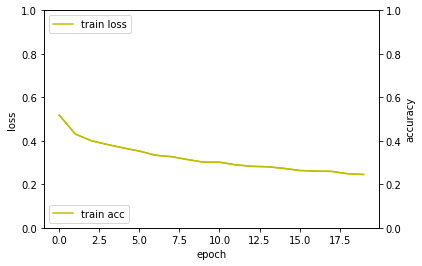

5381/5381 [==============================] - 0s 11us/step


[0.34924594169876166, 0.8621074149786285]

In [45]:
# import framework
import numpy as np
from  keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# data load
np.random.seed(5)

data_num = 10923
data_feature_num = 29
epoch = 20
batch_size = 128 

# data preprocessing

# model
model = Sequential()
model.add(Dense(62, input_dim=data_feature_num, activation='relu'))
model.add(Dense(124, input_dim=62, activation='relu'))
model.add(Dense(62, input_dim=124, activation='relu'))
model.add(Dense(data_feature_num, input_dim=62, activation='relu'))
model.add(Dense(1, input_dim=data_feature_num, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size)

# draw graph
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['loss'], 'y', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# model evaluation
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=batch_size)
loss_and_metrics

In [46]:
from keras.models import load_model
model.save('keras_model.h5')
# returns a compiled model
# identical to the previous one
# model = load_model('my_model.h5')

In [47]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

result = LinearSVC(random_state=0).fit(x_train, y_train)
result.predict(x_test)
print("SVM :",accuracy_score(result.predict(x_test),y_test))

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM : 0.7675153317227281


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, result.predict(x_test)))

             precision    recall  f1-score   support

          0       0.69      0.72      0.70      2063
          1       0.82      0.80      0.81      3318

avg / total       0.77      0.77      0.77      5381



In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(result, X_scaled, y, cv=5)
scores    

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was pass

array([0.74402207, 0.77805028, 0.75214724, 0.75736196, 0.75766871])

In [50]:
loss_and_metrics

[0.34924594169876166, 0.8621074149786285]

In [51]:
x_test.iloc[[0]]

,Question_count,First_ratio,Second_ratio,Tag_count,pos_ratio,neg_ratio,subjectivity,Polarity,senti_diffs_per_ref,Sticker_count,...,img img text img img,img img text img text,img text img img img,img text img img text,img text img text img,text img img img img,text img img img text,text img img text img,text img text img img,text img text img text
10126,-0.335679,0.524746,-0.152288,0.103331,0.094635,-0.411913,-0.205877,-0.567608,0.40855,-0.309408,...,-0.394113,3.087038,2.07869,0.094249,0.330932,-0.328008,2.854154,0.900209,1.780815,-0.41447


In [52]:
result.decision_function(x_test.iloc[[102]])

array([1.30919144])

In [54]:
y_test.iloc[102]

Credibility    1
Name: 15662, dtype: int64

# OLS Regression Results

In [55]:
import statsmodels.api as sm
x_2 = sm.add_constant(x)
est = sm.OLS(y,x_2.astype(float)).fit()

In [56]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            Credibility   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     243.8
Date:                Fri, 23 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:47:20   Log-Likelihood:                -8489.4
No. Observations:               16304   AIC:                         1.704e+04
Df Residuals:                   16274   BIC:                         1.727e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [57]:
feature_name

['Question_count',
 'First_ratio',
 'Second_ratio',
 'Tag_count',
 'pos_ratio',
 'neg_ratio',
 'subjectivity',
 'Polarity',
 'senti_diffs_per_ref',
 'Sticker_count',
 'Text_len',
 'Count_space_mistake',
 'Left',
 'Center',
 'Right',
 'Justify',
 'img img img img img',
 'img img img img text',
 'img img img text img',
 'img img text img img',
 'img img text img text',
 'img text img img img',
 'img text img img text',
 'img text img text img',
 'text img img img img',
 'text img img img text',
 'text img img text img',
 'text img text img img',
 'text img text img text']